The Fashion MNIST dataset was created by Zalando Research (a European fashion company).
It’s a standard benchmark dataset — just like MNIST digits — and its documentation defines the label meanings.



The original source:
📘 Zalando Research – Fashion-MNIST Dataset
👉 https://github.com/zalandoresearch/fashion-mnist

DATA DESCRIPTION


| Label | Class Name      | Description          |
| :---: | :-------------- | :------------------- |
|   0   | **T-shirt/top** | Short-sleeved top    |
|   1   | **Trouser**     | Pants                |
|   2   | **Pullover**    | Long-sleeved sweater |
|   3   | **Dress**       | One-piece dress      |
|   4   | **Coat**        | Overcoat or jacket   |
|   5   | **Sandal**      | Open shoe            |
|   6   | **Shirt**       | Button-down shirt    |
|   7   | **Sneaker**     | Sports shoe          |
|   8   | **Bag**         | Handbag or tote      |
|   9   | **Ankle boot**  | Boot or shoe         |


In [47]:
#step -1
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [48]:
#step-2
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

In [49]:
#70000 images
#60k-training
#10k - testing

In [50]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

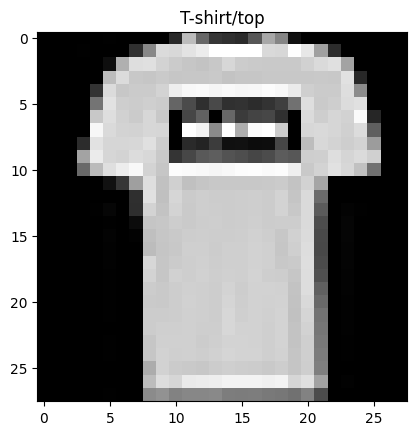

In [51]:
#visin image

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.imshow(x_train[1], cmap='gray')
plt.title(class_names[y_train[1]])
plt.show()

In [52]:
#0-255

x_train = x_train/255
x_test = x_test/255

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [54]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
#compiling
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [58]:
#training
history = model.fit(x_train,y_train,epochs = 15,validation_data = (x_test,y_test),callbacks=[early_stop])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8697 - loss: 0.3645 - val_accuracy: 0.8574 - val_loss: 0.3902
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8666 - loss: 0.3614 - val_accuracy: 0.8744 - val_loss: 0.3483
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8740 - loss: 0.3491 - val_accuracy: 0.8701 - val_loss: 0.3607
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3364 - val_accuracy: 0.8718 - val_loss: 0.3559
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8742 - loss: 0.3430 - val_accuracy: 0.8731 - val_loss: 0.3452
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8800 - loss: 0.3388 - val_accuracy: 0.8792 - val_loss: 0.3396
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8793 - loss: 0.3277 - val_accuracy: 0.8769 - val_loss: 0.3416
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8820 - loss: 0.3217 - 

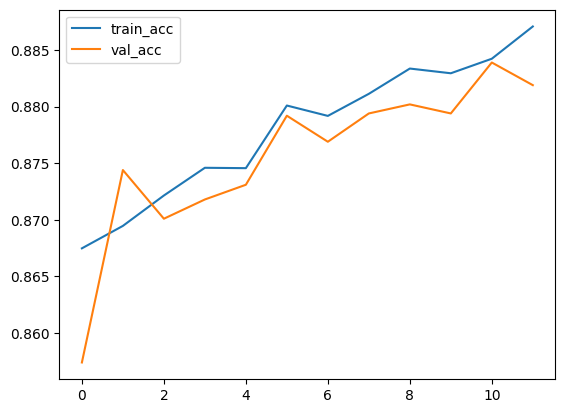

In [59]:
plt.plot(history.history['accuracy'],label ='train_acc')
plt.plot(history.history['val_accuracy'],label ='val_acc')
plt.legend()
plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0.5, 1.0, 'Actual: 5| predicted: 5')

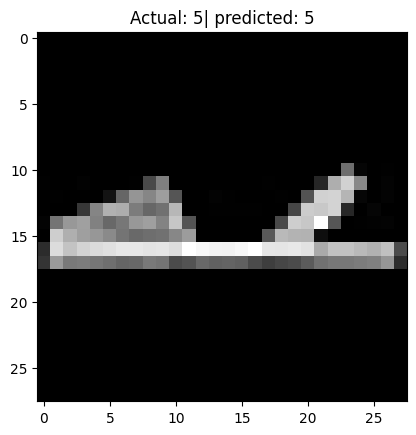

In [60]:
import numpy as np
pred = model.predict(x_test)

index = 111

plt.imshow(x_test[index],cmap ='gray')
plt.title(f"Actual: {y_test[index]}| predicted: {np.argmax(pred[index])}")

In [61]:
import numpy as np
a = [2,5,50,100]
print(np.argmax(a))

3


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


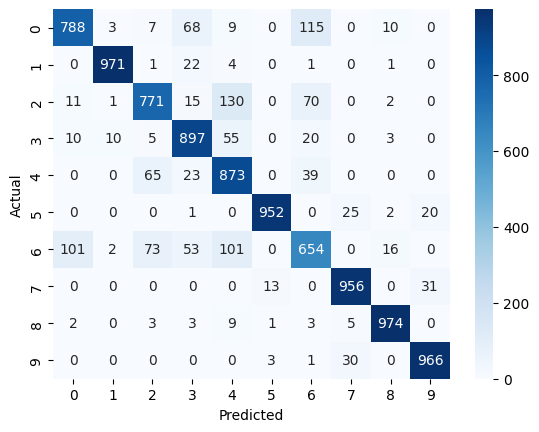

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.79      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.77      0.80      1000
       Dress       0.83      0.90      0.86      1000
        Coat       0.74      0.87      0.80      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.65      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



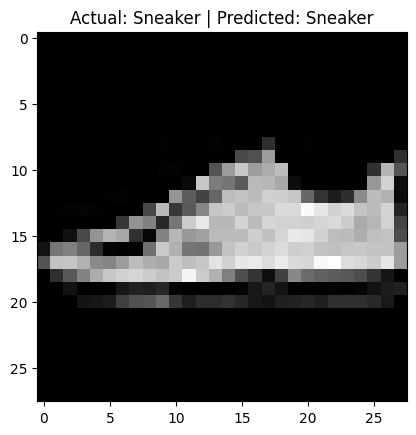

In [64]:
i = np.random.randint(0, len(x_test))
plt.imshow(x_test[i], cmap='gray')
plt.title(f"Actual: {class_names[y_test[i]]} | Predicted: {class_names[y_pred[i]]}")
plt.show()
